In [10]:
#building a predictive model using a random forest classifier with the steps of
#preprocessing, performance evaluation, and visualization of the results:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Load the data
#df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", header = None)
#df.columns = ['variance','skewness','curtosis','entropy','class']
#url = r"C:\Users\s1107709\Downloads\archive\iris.csv"
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=colnames)
#iris = pd.read_csv(url)

df = iris

In [12]:
# Preprocessing
# Split the data into training and test sets
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize the model
rf = RandomForestClassifier()


In [14]:
# Define the parameter grid
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}


In [15]:
# Initialize the grid search object
grid = GridSearchCV(rf, param_grid, cv=5)

In [16]:
# Fit the grid search object to the data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [50, 100, 200]})

In [17]:
# Make predictions on the test set
y_pred = grid.predict(X_test)

In [18]:
# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print("Accuracy: ", acc)
print("Confusion Matrix: \n", conf_mat)

Accuracy:  1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


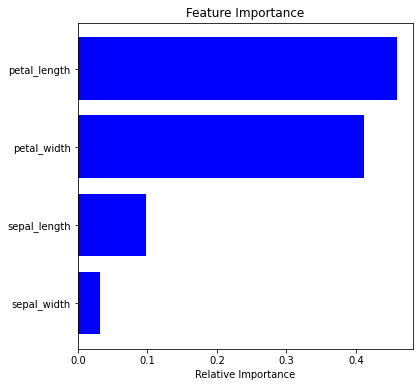

In [19]:
# Visualize the feature importance
importances = grid.best_estimator_.feature_importances_
features = X_train.columns
indices = np.argsort(importances)
plt.figure(figsize=(6,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()